## 0. Предварительные действия

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install pycountry

In [3]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [4]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [5]:
DATA_DIR = 'D:/Python/IDE/project_3/data'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'/hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [6]:
# Подгрузим наши данные из соревнования

#DATA_DIR = '/kaggle/input/sf-booking/'
#df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
#df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # датасет для предсказания
#sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [8]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [10]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [11]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [12]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [13]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

hotels = pd.concat([df_test, df_train], sort=False).reset_index(drop=True) # объединяем

In [14]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

## 1. Базовая проверка качества датасета

In [15]:
# Ищем выводим колонки с пропуском
cols_null_percent = hotels.isnull().mean()*100
cols_with_null = cols_null_percent[cols_null_percent > 0].sort_values(ascending=False)
print(cols_with_null)

lat    0.633655
lng    0.633655
dtype: float64


In [16]:
# Временно заполняем нулями, но мы ещё вернёмся к этому
#hotels['lat'] = hotels['lat'].fillna(0)
#hotels['lng'] = hotels['lng'].fillna(0)

In [17]:
# Проверим, какие отели имеют пропуски в координатах - отелей мало, можем заполнить вручную погуглив адреса и координаты
hotels[hotels['lat'].isnull()]['hotel_address'].value_counts()

hotel_address
Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria    658
Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria            563
W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria       389
4 rue de la P pini re 8th arr 75008 Paris France               290
Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria         245
W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria          223
Savoyenstra e 2 16 Ottakring 1160 Vienna Austria               194
Sieveringer Stra e 4 19 D bling 1190 Vienna Austria            147
Bail n 4 6 Eixample 08010 Barcelona Spain                      146
Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria             93
Hasenauerstra e 12 19 D bling 1190 Vienna Austria               61
Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria        57
23 Rue Damr mont 18th arr 75018 Paris France                    55
Paragonstra e 1 11 Simmering 1110 Vienna Austria                49
20 Rue De La Ga t 14th arr 75014 Paris France   

In [18]:
hotels[hotels['lng'].isnull()]['hotel_address'].value_counts()
# Убедились, что пропуски по тем же адресам

hotel_address
Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria    658
Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria            563
W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria       389
4 rue de la P pini re 8th arr 75008 Paris France               290
Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria         245
W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria          223
Savoyenstra e 2 16 Ottakring 1160 Vienna Austria               194
Sieveringer Stra e 4 19 D bling 1190 Vienna Austria            147
Bail n 4 6 Eixample 08010 Barcelona Spain                      146
Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria             93
Hasenauerstra e 12 19 D bling 1190 Vienna Austria               61
Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria        57
23 Rue Damr mont 18th arr 75018 Paris France                    55
Paragonstra e 1 11 Simmering 1110 Vienna Austria                49
20 Rue De La Ga t 14th arr 75014 Paris France   

In [19]:
# Формируем таблицу и гуглим координаты
name_and_address = hotels[hotels['lat'].isnull()].groupby(['hotel_address', 'hotel_name']).count()[['lat', 'lng']]
name_and_address

,,lat,lng
hotel_address,hotel_name,,
20 Rue De La Ga t 14th arr 75014 Paris France,Mercure Paris Gare Montparnasse,0,0
23 Rue Damr mont 18th arr 75018 Paris France,Holiday Inn Paris Montmartre,0,0
4 rue de la P pini re 8th arr 75008 Paris France,Maison Albar Hotel Paris Op ra Diamond,0,0
Bail n 4 6 Eixample 08010 Barcelona Spain,NH Collection Barcelona Podium,0,0
Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria,City Hotel Deutschmeister,0,0
Hasenauerstra e 12 19 D bling 1190 Vienna Austria,Hotel Park Villa,0,0
Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria,Fleming s Selection Hotel Wien City,0,0
Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria,Cordial Theaterhotel Wien,0,0
Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria,Hotel Daniel Vienna,0,0


In [20]:
# Будем делать индекс по адресам что бы потом им обновить основной датасет
hotels_null_coords = hotels[hotels['lat'].isnull()].groupby(['hotel_address']).count()[['lat', 'lng']]
hotels_null_coords

,lat,lng
hotel_address,,
20 Rue De La Ga t 14th arr 75014 Paris France,0,0
23 Rue Damr mont 18th arr 75018 Paris France,0,0
4 rue de la P pini re 8th arr 75008 Paris France,0,0
Bail n 4 6 Eixample 08010 Barcelona Spain,0,0
Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria,0,0
Hasenauerstra e 12 19 D bling 1190 Vienna Austria,0,0
Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria,0,0
Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria,0,0
Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria,0,0


In [21]:
hotels_coords = [[48.8399957, 2.3070823], 
           [48.8889127, 2.3309643], 
           [48.8753208, 2.3212033], 
           [41.391552, 2.1757053],
           [48.2208555, 16.3644228],
           [48.233592, 16.3434781],
           [48.2094054, 16.3512565],
           [48.2095525, 16.3492746],
           [48.1888183, 16.381591],
           [48.1868142, 16.418528],
           [41.3927888, 2.1673975],
           [48.219573, 16.2834034],
           [41.3832425, 2.1607609],
           [48.2458909, 16.3397395],
           [48.2135906, 16.3777195],
           [48.2168032, 16.357717],
           [48.220414, 16.3536299]]

In [22]:
hotels = hotels.set_index('hotel_address')
hotels.update(hotels_null_coords)
hotels = hotels.reset_index()

In [23]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [24]:
# Сводка уникальных значений, разбираемся, что у нас будет категориальным признаком
hotels.nunique(dropna=False)

hotel_address                                   1493
additional_number_of_scoring                     480
review_date                                      731
average_score                                     34
hotel_name                                      1492
reviewer_nationality                             227
negative_review                               330011
review_total_negative_word_counts                402
total_number_of_reviews                         1142
positive_review                               412601
review_total_positive_word_counts                365
total_number_of_reviews_reviewer_has_given       198
tags                                           55242
days_since_review                                731
lat                                             1473
lng                                             1473
sample                                             2
reviewer_score                                    38
dtype: int64

In [25]:
# Ищем дубликаты
dupl_col=list(hotels.columns)
mask=hotels.duplicated(subset=dupl_col)
data_doubles=hotels[mask]
data_doubles.shape
# В таблице имеется 336 дубликатов. Однако, по условиям задачи удалять строки нельзя, так что пока оставим как есть.

(336, 18)

## 2. Работаем со столбцами

In [26]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

### hotel_address

In [27]:
# Работаем с адресом отеля (страна)
import pycountry
countries = {c.name for c in pycountry.countries} | {c.official_name for c in pycountry.countries if hasattr(c, "official_name")} | {c.alpha_3 for c in pycountry.countries} | {c.alpha_2 for c in pycountry.countries}

def extract_country(address):
    for country in countries:
        if address.endswith(country):
            return country
    return None

# Применяем к колонке
hotels["country"] = hotels["hotel_address"].apply(extract_country)

In [28]:
# Смотрим, что получилось
hotels.country.value_counts()
# Получилось немного стран, попробуем выделить города

country
United Kingdom    262301
Spain              60149
France             59928
Netherlands        57214
Austria            38939
Italy              37207
Name: count, dtype: int64

In [29]:
# вытаскиваем город из адреса
def extract_city(addr):
    parts = addr.split()
    if parts[-2:] == ['United', 'Kingdom']:
        return parts[-5]  # для UK формаат адреса город код код United Kingdom
    else:
        return parts[-2]  # для всех остальных город перед страной

# Создаем признак city
hotels["city"] = hotels["hotel_address"].apply(extract_city)


In [30]:
hotels['city'].value_counts()

city
London       262301
Barcelona     60149
Paris         59928
Amsterdam     57214
Vienna        38939
Milan         37207
Name: count, dtype: int64

Пользы нет - в датасете все гостиницы из одной страны находятся в одном городе. Пока не удаляем - используем эти данные для лучшего заполнения координат

### Дата ревью

In [31]:
#Преобразуем в datetime
hotels['review_date'] = pd.to_datetime(hotels['review_date'], dayfirst=True, errors='coerce')

# Создаём признаки год, месяц, день недели и является ли день выходным. Дата будет очевидно не информативным признаком, вместо неё берём день недели
# и статус выходного (теория - "платные" накрутки чаще происходят в будний день)
hotels['year'] = hotels['review_date'].dt.year
hotels['month'] = hotels['review_date'].dt.month
hotels['dayofweek'] = hotels['review_date'].dt.weekday  # 0 = понедельник, 6 = воскресенье
hotels['is_weekend'] = (hotels['dayofweek'] >= 5).astype('int8')
hotels["quarter"] = hotels["review_date"].dt.quarter
hotels["weekofyear"] = hotels["review_date"].dt.isocalendar().week.astype("int16")

C:\Users\dmytr\AppData\Local\Temp\ipykernel_21896\3715416797.py:2: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  hotels['review_date'] = pd.to_datetime(hotels['review_date'], dayfirst=True, errors='coerce')


In [32]:
#Сезоны
def season(m):
    return ("winter" if m in [12,1,2] else
            "spring" if m in [3,4,5] else
            "summer" if m in [6,7,8] else "autumn")
hotels["season"] = hotels["month"].map(season)
# Сразу кодируем через get_dummies
hotels = pd.get_dummies(hotels, columns=['season'], drop_first=True)

In [33]:
# Проверям все ли получилось
hotels[['year', 'month', 'dayofweek', 'is_weekend']].head()

,year,month,dayofweek,is_weekend
0,2017,7,4,0
1,2016,12,0,0
2,2015,11,3,0
3,2015,10,5,1
4,2016,5,0,0


### hotel_name 

In [34]:
# сколько всего отзывов у отеля / города
hotels["hotel_reviews_cnt"] = hotels["hotel_name"].map(hotels["hotel_name"].value_counts())
hotels["city_reviews_cnt"]  = hotels["city"].map(hotels["city"].value_counts())

In [35]:
hotels['hotel_name'].describe()

count                                         515738
unique                                          1492
top       Britannia International Hotel Canary Wharf
freq                                            4789
Name: hotel_name, dtype: object

In [36]:
#Попробуем закодировать с помощью frequency и targetencoding
from sklearn.model_selection import KFold

# freq
freq = hotels['hotel_name'].value_counts()
hotels['hotel_name_freq'] = hotels['hotel_name'].map(freq).astype('int32')

#target
kf = KFold(n_splits=5, shuffle=True, random_state=42)
te = np.zeros(len(hotels))
for tr, va in kf.split(hotels):
    m = hotels.iloc[tr].groupby('hotel_name')['reviewer_score'].mean()
    te[va] = hotels.iloc[va]['hotel_name'].map(m)
hotels['hotel_name_te'] = te

In [37]:
#Альтернатива - довичное кодирование с помощью category_encoders
#import category_encoders as ce
#bin_encoder = ce.BinaryEncoder(cols=['hotel_name'])
#data_bin=bin_encoder.fit_transform(hotels['hotel_name'])
#hotels = pd.concat([hotels, data_bin], axis=1)

In [38]:
# Кодируем название отелей через get_dummies - тесты показали наилучший результат
#hotels = pd.get_dummies(hotels, columns=['hotel_name'], drop_first=True)

### reviewer_nationality

In [39]:
# Убираем пробелы в национальности
hotels["reviewer_nationality"] = hotels["reviewer_nationality"].str.strip()

In [40]:
a=hotels['reviewer_nationality'].value_counts()
print(len(a))

227


In [41]:
# Делаем признак того, что отзыв оставлен соотечественником (теория - те, кто ездят внутри страны имеют другие требования к отелю)
hotels['is_domestic'] = (
    hotels['reviewer_nationality'].astype(str).str.strip().str.casefold()
    == hotels['country'].astype(str).str.strip().str.casefold()
).astype('int8')

In [42]:
# Дополнительные признаки - поездка по стране для целей бизнес и поездка по стране для удовольствия
hotels["domestic_x_business"] = hotels["is_domestic"] * hotels.get("trip_business_trip", 0)
hotels["domestic_x_leisure"]  = hotels["is_domestic"] * hotels.get("trip_leisure_trip", 0)

In [43]:
import numpy as np
from sklearn.model_selection import KFold

# Frequency encoding (просто количество записей по стране)
freq = hotels['reviewer_nationality'].value_counts()
hotels['reviewer_nationality_freq'] = hotels['reviewer_nationality'].map(freq)

# Target encoding с защитой от NaN
kf = KFold(n_splits=5, shuffle=True, random_state=42)
te = np.zeros(len(hotels))

global_mean = hotels['reviewer_score'].mean()

for train_idx, val_idx in kf.split(hotels):
    means = hotels.iloc[train_idx].groupby('reviewer_nationality')['reviewer_score'].mean()
    # map + fillna глобальным средним
    te[val_idx] = hotels.iloc[val_idx]['reviewer_nationality'].map(means).fillna(global_mean)

hotels['reviewer_nationality_te'] = te

### negative_review/positive_review

In [44]:
# Работаем с текстом отрицательного отзыва negative_review через ntlk с полным набором скачанных пакетов
import re
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def clean_text(s: str) -> str:
    if not isinstance(s, str): 
        return ""
    s = s.strip()
    s = re.sub(r"(https?://\S+)|(\S+@\S+)", " ", s)                     # удалим URL и email
    s = re.sub(r"[^A-Za-z0-9\s\.\,\!\?\-']", " ", s)                    # оставим только валидные символы
    s = re.sub(r"\s+", " ", s).strip()                                  # уберём лишние пробелы
    return s

# Очистка текста
hotels["neg_clean"] = hotels["negative_review"].map(clean_text)

# Признаки
hotels["neg_len_chars"] = hotels["neg_clean"].str.len()
hotels["neg_len_words"] = hotels["neg_clean"].str.split().str.len()
hotels["exclam_cnt"]    = hotels["neg_clean"].str.count(r"!")
hotels["quest_cnt"]     = hotels["neg_clean"].str.count(r"\?")
hotels["caps_ratio"]    = hotels["negative_review"].map(
    lambda s: (sum(c.isupper() for c in s) / max(1, len(s))) if isinstance(s, str) else 0.0
)
hotels["neg_vader"] = hotels["neg_clean"].map(lambda s: sia.polarity_scores(s)["compound"])
#hotels["is_no_negative"] = hotels["neg_clean"].str.fullmatch(r"(?i)no negative").fillna(False).astype("int8") # если отзыв состоит из фразы "No Negative" то он положительный


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dmytr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [45]:
# Судя по всему пользователь не мог оставить поле для негативного отзыва пустым, пытаемся найти ситуации, когд негативный отзыв по сути отсутствует

# нормализация: нижний регистр, убираем всё кроме букв/цифр/пробелов, схлопываем пробелы
def _norm(s: str) -> str:
    s = s.lower().strip()
    # уберём урлы/почту на всякий случай
    s = re.sub(r"(https?://\S+)|(\S+@\S+)", " ", s)
    # оставим буквы/цифры/пробелы
    s = re.sub(r"[^a-z0-9\s]", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

# строгие фразы (нормализованные)
STRICT_SET = {
    "no negative", "no negatives", "nothing negative",
    "nothing", "nothing really", "nothing at all", "nothing in particular",
    "no complaints",
    "nothing to dislike", "nothing to complain about", "nothing not to like",
    "absolutely nothing",
    "none", "nil", "na",  # сюда сойдут и "n a"/"n/a" после нормализации
    "all good", "all was good", "nothing all good",
    "everything", "everything was good", "everything was great",
    "everything was perfect", "everything was fine",
    "liked everything", "i liked everything",
    "see above", "as above",
    "no thing",
}

# расширенные (нормализованные)
EXTENDED_SET = {
    "no",                  # ровно "no", не "no parking"
    "leaving", "having to leave",
    "not applicable",
    "non",                 # FR "non" (если строка только это слово)
    "not much",
    "cant think of anything"  # вариант без апострофа
}

# отдельный шаблон для "can't think of anything" с апострофом и вариациями пробелов
CANT_THINK_RE = re.compile(r"\bcan\s*t\s*think\s*of\s*anything\b")

# строки, которые считаем «пустыми» после чистки «декора»
ONLY_DECOR_RE = re.compile(r"^\s*[\(\)\[\]\{\}\-\_\.\,\!\?\/\\\|~\*]+\s*$")

def is_no_negative_text(s: str, use_extended: bool = True) -> int:
    if not isinstance(s, str) or not s.strip():
        return 1  # пустая строка → no negative

    # если одни скобки/декор — считаем пустым
    if ONLY_DECOR_RE.fullmatch(s):
        return 1

    ns = _norm(s)
    if ns == "":
        return 1

    # явные попадания в строгий список
    if ns in STRICT_SET:
        return 1

    # "can't think of anything" с любыми апострофами/пробелами
    if CANT_THINK_RE.search(ns):
        return 1

    # расширенные
    if use_extended and ns in EXTENDED_SET:
        return 1

    return 0

# Применение к колонке (лучше использовать уже очищенный текст, напр. hotels['neg_clean'])
hotels["is_no_negative"] = hotels["neg_clean"].map(lambda x: is_no_negative_text(x, use_extended=True)).astype("int8")


In [46]:
sia = SentimentIntensityAnalyzer()

def clean_text(s: str) -> str:
    if not isinstance(s, str): 
        return ""
    s = s.strip()
    s = re.sub(r"(https?://\S+)|(\S+@\S+)", " ", s)
    s = re.sub(r"[^A-Za-z0-9\s\.\,\!\?\-']", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

# Очистка текста
hotels["pos_clean"] = hotels["positive_review"].map(clean_text)

# Признаки
hotels["pos_len_chars"] = hotels["pos_clean"].str.len()
hotels["pos_len_words"] = hotels["pos_clean"].str.split().str.len()
hotels["pos_exclam_cnt"] = hotels["pos_clean"].str.count(r"!")
hotels["pos_quest_cnt"]  = hotels["pos_clean"].str.count(r"\?")
hotels["pos_caps_ratio"] = hotels["positive_review"].map(
    lambda s: (sum(c.isupper() for c in s) / max(1, len(s))) if isinstance(s, str) else 0.0
)
hotels["pos_vader"] = hotels["pos_clean"].map(lambda s: sia.polarity_scores(s)["compound"])
hotels["is_no_positive"] = hotels["pos_clean"].str.fullmatch(r"(?i)no positive").fillna(False).astype("int8") # если отзыв состоит из фразы "No Positive" то он отрицательный

In [47]:
# Положительные и отрицательные слова
neg_words = ("dirty","smell","noisy","rude","slow","cold","hot","broken","poor","bad", 'small', 'expensive', 'worst', 'hate', 'terrible', 'awful', 'disappointing', 'disappointed',)
pos_words = ("clean","friendly","quiet","fast","warm","great","excellent","amazing","good","nice", 'quite', 'love', 'loved', 'lovely', 'perfect','perfectly',
             'quiet','spacious','modern', 'again')

def count_any(text, vocab): 
    s = str(text).lower()
    return sum(w in s for w in vocab)

hotels["neg_kw_cnt"] = hotels["neg_clean"].map(lambda s: count_any(s, neg_words))
hotels["pos_kw_cnt"] = hotels["pos_clean"].map(lambda s: count_any(s, pos_words))

### TAGS

In [48]:
hotels['tags'].value_counts()

tags
[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                              5101
[' Leisure trip ', ' Couple ', ' Standard Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                     4931
[' Leisure trip ', ' Couple ', ' Superior Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                     4366
[' Leisure trip ', ' Couple ', ' Deluxe Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                       3991
[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']                             3291
                                                                                                                                     ... 
[' Group ', ' Executive Double Room ', ' Stayed 7 nights ']                                                                             1
[' Leisure trip ', ' Couple '

Немного поработаем с dtale что бы разобраться, какие в принципе есть теги и отобрали те, которые кажутся наиболее оптимальными

In [49]:
# Преобразуем колонку 'tags' из строки в список
hotels['tags'] = hotels['tags'].apply(eval)

In [50]:
# Функция очистки тегов - убираем пробелы по краям и заменяем пробелы внутри тега на _
def clean_tags(tag_list):
    return [tag.strip().replace(" ", "_") for tag in tag_list]

# Применяем очистку
hotels['tags'] = hotels['tags'].apply(clean_tags)

# Собираем все теги в один длинный список
all_tags = [tag for tag_list in hotels['tags'] for tag in tag_list]

In [51]:
from collections import Counter

tag_counts = Counter(all_tags)
print(tag_counts.most_common(100))

[('Leisure_trip', 417778), ('Submitted_from_a_mobile_device', 307640), ('Couple', 252294), ('Stayed_1_night', 193645), ('Stayed_2_nights', 133937), ('Solo_traveler', 108545), ('Stayed_3_nights', 95821), ('Business_trip', 82939), ('Group', 65392), ('Family_with_young_children', 61015), ('Stayed_4_nights', 47817), ('Double_Room', 35207), ('Standard_Double_Room', 32248), ('Superior_Double_Room', 31393), ('Family_with_older_children', 26349), ('Deluxe_Double_Room', 24823), ('Double_or_Twin_Room', 22393), ('Stayed_5_nights', 20845), ('Standard_Double_or_Twin_Room', 17483), ('Classic_Double_Room', 16989), ('Superior_Double_or_Twin_Room', 13570), ('2_rooms', 12393), ('Stayed_6_nights', 9776), ('Standard_Twin_Room', 9745), ('Single_Room', 9670), ('Twin_Room', 8321), ('Stayed_7_nights', 7399), ('Executive_Double_Room', 6425), ('Classic_Double_or_Twin_Room', 6107), ('Superior_Twin_Room', 6064), ('Deluxe_Double_or_Twin_Room', 5998), ('Club_Double_Room', 5908), ('Queen_Room', 5472), ('Deluxe_King_

In [52]:
import re
import ast

# На всякий случай: привести колонку к спискам
def to_list_safe(x):
    if isinstance(x, list):
        return x
    if isinstance(x, str):
        try:
            v = ast.literal_eval(x)
            return v if isinstance(v, list) else [x]
        except:
            return [x]
    return []  # None и прочее

hotels["tags"] = hotels["tags"].apply(to_list_safe)

# Чистим пробелы
hotels["tags"] = hotels["tags"].apply(lambda tags: [t.strip() for t in tags if isinstance(t, str)])

# Поиск подстроки (без учёта регистра)
def has_tag(tags, keyword):
    kw = keyword.lower()
    return int(any(kw in (t or "").lower() for t in tags))

# Бинарные признаки
trip_types = ["Leisure trip", "Business trip"]
companions = ["Couple", "Solo traveler", "Family with young children",
              "Family with older children", "Group"]

for t in trip_types:
    hotels[f"trip_{t.replace(' ', '_').lower()}"] = hotels["tags"].apply(lambda x: has_tag(x, t))

for c in companions:
    hotels[f"companion_{c.replace(' ', '_').lower()}"] = hotels["tags"].apply(lambda x: has_tag(x, c))

# Разбор'Stayed X night(s)' через regex
stay_re = re.compile(r"stayed\s+(\d+)\s+night", re.IGNORECASE)

def stay_length(tags):
    for t in tags:
        if not isinstance(t, str):
            continue
        m = stay_re.search(t)
        if m:
            try:
                num = int(m.group(1))
            except:
                continue
            if num == 1:
                return "short"
            elif num <= 3:
                return "medium"
            elif num <= 7:
                return "week"
            else:
                return "long"
    return None

hotels["stay_length"] = hotels["tags"].apply(stay_length)

# Тип номера
room_keywords = ["Suite", "Apartment", "Studio", "Room"]

def room_type(tags):
    low = [(t or "").lower() for t in tags if isinstance(t, str)]
    for kw in room_keywords:
        if any(kw.lower() in t for t in low):
            return kw
    return None

hotels["room_type"] = hotels["tags"].apply(room_type)

# Признаки удобств
def has_kw(tags, kw): 
    return int(any(kw in t.lower() for t in tags))
amenities = ["breakfast", "parking", "spa", "gym", "pool", "airport", "metro", "city_center"]
for kw in amenities:
    hotels[f"tag_{kw}"] = hotels["tags"].apply(lambda ts: has_kw(ts, kw))


In [53]:
# Кодируем длину пребывания в отеле и тип номера
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=["stay_length", "room_type"], use_cat_names=True)
hotels = encoder.fit_transform(hotels)  

### days_since_review

In [54]:
# Работаем с days_since_review
hotels["days_since_review"] = hotels["days_since_review"].str.extract(r'(\d+)').astype(int)

### Добавляем разные фичи

In [55]:
# Расстояние до центра города
city_center = {
    "London": (51.5074, -0.1278),
    "Barcelona": (41.3851, 2.1734),
    "Paris": (48.8566, 2.3522),
    "Amsterdam": (52.3676, 4.9041),
    "Vienna": (48.2100, 16.3738),
    "Milan": (45.4642, 9.1900),
}

def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0
    p1, p2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlmb = np.radians(lon2 - lon1)
    a = np.sin(dphi/2)**2 + np.cos(p1)*np.cos(p2)*np.sin(dlmb/2)**2
    return 2*R*np.arcsin(np.sqrt(a))

hotels["dist_center_km"] = hotels.apply(
    lambda r: haversine(r["lat"], r["lng"], *city_center.get(r["city"], (r["lat"], r["lng"]))), axis=1
)

## Кодируем остатки

In [56]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 78 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

In [57]:
# кодируем страну
encoder = ce.OneHotEncoder(cols=["country"], use_cat_names=True)
hotels = encoder.fit_transform(hotels)  

In [58]:
# кодируем город
encoder = ce.OneHotEncoder(cols=["city"], use_cat_names=True)
hotels = encoder.fit_transform(hotels)

### Дропаем лишнее

In [59]:
#Удаляем все колонки с типом object
hotels = hotels.drop(columns=[col for col in hotels.columns if hotels[col].dtype == 'object'])

In [60]:
# удаляем дату обзора
hotels = hotels.drop(columns=['review_date'])

In [61]:
# Экономим место

# выбираем только int64-колонки
int64_cols = hotels.select_dtypes(include="int64").columns

# фильтруем из них бинарные (только 0/1)
binary_cols = [col for col in int64_cols if hotels[col].dropna().nunique() == 2]

# переводим в int8
hotels = hotels.astype({col: "int8" for col in binary_cols})

In [62]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 79 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  int64  
 3   total_number_of_reviews                     515738 non-null  int64  
 4   review_total_positive_word_counts           515738 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 6   days_since_review                           515738 non-null  int64  
 7   lat                                         515738 non-null  float64
 8   lng                                         515738 non-null  float64
 9   sample                                      515738 non-null  int8   
 

In [63]:
# Эксперимент - дропаем самые слабые признаки
#hotels=hotels.drop(columns=['pos_vader'])

# Финализируем

In [64]:
# Выводим список мультиколлинеарных признаков
# Берем порог 0,75
#def high_corr_pairs(df, corr_thr=0.75):
   #corr = df.corr(numeric_only=True)  # только числовые колонки
   #pairs = []
   #for i in range(len(corr.columns)):
      #for j in range(i+1, len(corr.columns)):
         #if abs(corr.iloc[i, j]) >= corr_thr:
               #pairs.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))
   #return pairs


#pairs = high_corr_pairs(hotels, corr_thr=0.75)
#for a, b, c in pairs:
   #print(f"{a:20} ~ {b:20} corr={c:.3f}")

Как мы и догадывались - города и страны коррелируют 1 к 1. Удаляем страны.
Есть сильная корреляция между числом слов и символов. Убираем число символов - считаем, что слова показательнее.
убираем число дней после обзора т.к. сильная корреляция с годом
Есть сильная зависимость между числом оценок без отзыва и частотой появления имени отеля. Попробуем убрать число дополнительных отзывов, т.к. имя отеля у нас часть кодирования. День недели коррелирует с фактором выходного дня на 0.831 - удаляем день недели.

In [65]:
hotels=hotels.drop(columns=['additional_number_of_scoring', 'review_total_negative_word_counts','review_total_negative_word_counts','review_total_positive_word_counts',
                           'review_total_positive_word_counts','days_since_review', 'country_Italy','country_Netherlands','country_Spain','country_United Kingdom',
                           'country_France','country_Austria','neg_len_chars','pos_len_chars', 'dayofweek'])

In [66]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 66 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   average_score                               515738 non-null  float64
 1   total_number_of_reviews                     515738 non-null  int64  
 2   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 3   lat                                         515738 non-null  float64
 4   lng                                         515738 non-null  float64
 5   sample                                      515738 non-null  int8   
 6   reviewer_score                              515738 non-null  float64
 7   city_Milan                                  515738 non-null  int8   
 8   city_Amsterdam                              515738 non-null  int8   
 9   city_Barcelona                              515738 non-null  int8   
 

In [67]:
# Теперь выделим тестовую часть
train_data = hotels.query('sample == 1').drop(['sample'], axis=1)
test_data = hotels.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [68]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [69]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 65), (386803, 65), (386803, 64), (309442, 64), (77361, 64))

In [70]:
# сколько колонок?
print(len(hotels.select_dtypes("number").columns))
# общий размер
print(hotels.memory_usage(deep=True).sum()/1024**3, "GB")
# самые прожорливые столбцы
print(hotels.memory_usage(deep=True).sort_values(ascending=False).head(10))

63
0.14553661085665226 GB
average_score                                 4125904
total_number_of_reviews                       4125904
total_number_of_reviews_reviewer_has_given    4125904
stay_length_nan                               4125904
lat                                           4125904
lng                                           4125904
reviewer_score                                4125904
quest_cnt                                     4125904
hotel_name_te                                 4125904
city_reviews_cnt                              4125904
dtype: int64


In [71]:
cols_to_drop = [

    # по корреляции
    "city_reviews_cnt",
    "hotel_name_freq",
    "quarter",
    "weekofyear",
]

drop_now = [c for c in cols_to_drop if c in hotels.columns]
hotels.drop(columns=drop_now, inplace=True)
print(f"Dropped {len(drop_now)} columns:", drop_now)

Dropped 4 columns: ['city_reviews_cnt', 'hotel_name_freq', 'quarter', 'weekofyear']


In [72]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [73]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [74]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   47.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.4s finished


In [75]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAPE:', metrics.mean_absolute_error(y_test, y_pred))

MAPE: 0.8594888807021623


<Axes: >

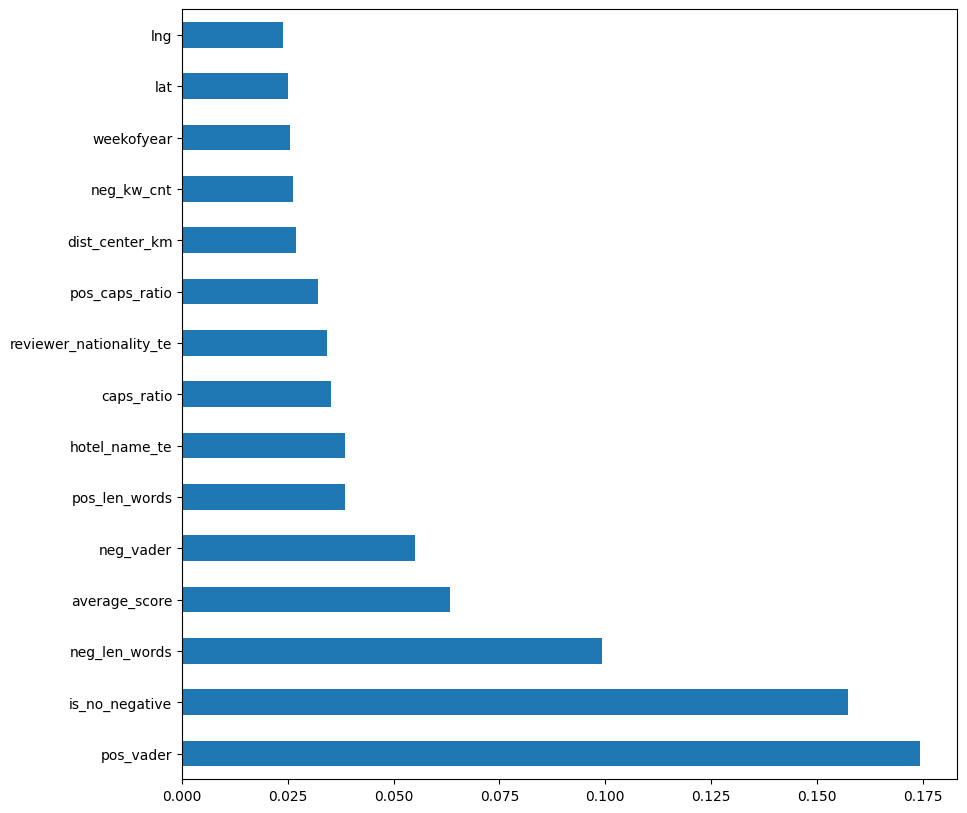

In [76]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [77]:
test_data.sample(10)

,average_score,total_number_of_reviews,total_number_of_reviews_reviewer_has_given,lat,lng,reviewer_score,city_Milan,city_Amsterdam,city_Barcelona,city_London,...,room_type_nan,tag_breakfast,tag_parking,tag_spa,tag_gym,tag_pool,tag_airport,tag_metro,tag_city_center,dist_center_km
48544,7.7,1238,12,48.210736,16.382147,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.623901
68881,9.2,635,15,51.497320,-0.156256,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.266193
125783,8.5,2635,5,51.512763,-0.099716,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.032990
99339,9.0,1241,16,51.510470,-0.126582,0.0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0.351572
21665,8.4,728,4,48.877676,2.349316,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.352976
86411,8.6,619,10,48.860776,2.342756,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.832442
122439,8.5,2494,4,51.506935,-0.126012,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.134115
117745,8.4,2726,1,51.507377,0.038657,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,11.520361
18877,9.2,1740,39,51.517240,-0.122032,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.164662
88359,8.7,307,1,48.859702,2.323970,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.093855


In [78]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [79]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [80]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.7s finished


In [81]:
predict_submission

array([8.723, 7.509, 8.358, ..., 8.535, 9.535, 7.221])

In [82]:
list(sample_submission)

['reviewer_score', 'id']

In [83]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.723,488440
1,7.509,274649
2,8.358,374688
3,9.663,404352
4,9.608,451596
5,8.212,302161
6,7.609,317079
7,7.735,13963
8,8.628,159785
9,7.657,195089
